# 1. 머신러닝 기초 다지기


### 3.1 선형회귀

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape,diabetes.target.shape)

(442, 10) (442,)


In [4]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [5]:
diabetes.target[:3]

array([151.,  75., 141.])

In [6]:
import matplotlib.pyplot as plt

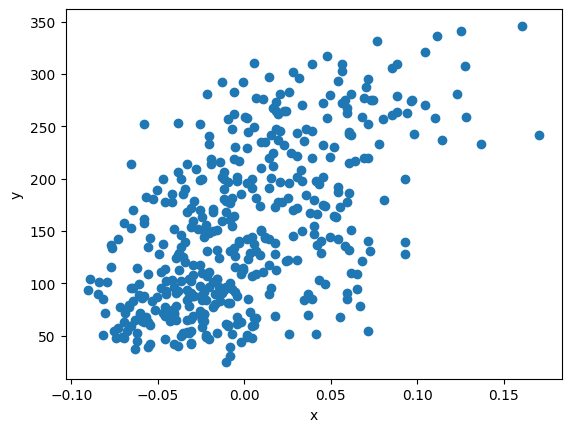

In [7]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
x = diabetes.data[:, 2]
y = diabetes.target

In [9]:
##퀴즈 슬라이싱, 훈련데이터 x에서 100번째 부터 109번째 샘플 출력. 슬라이싱 배열의 크기? 
## --> 9  슬라이싱을 하면 슬라이싱한 다음숫자부터 마지막슬라이싱한 숫자까지 포함하여 나옴.
Quize_y = y[100:109]
print(Quize_y)
Quize_y.shape


[128. 102. 302. 198.  95.  53. 134. 144. 232.]


(9,)

In [10]:
x_sample = x[99:109]
print(x_sample, x_sample.shape)

[-0.06440781  0.01750591 -0.04500719  0.02828403  0.04121778  0.06492964
 -0.03207344 -0.07626374  0.04984027  0.04552903] (10,)


### 3.2 경사하강

In [11]:
w = 1.0
b = 1.0

In [12]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186832


In [13]:
print(y[0])

151.0


In [14]:
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
print(y_hat_inc)

1.0678658271705517


In [15]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [16]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [17]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [18]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [19]:
b_new = b + 1
print(b_new)

2.0


In [20]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [21]:
y_hat = x[1] * w_new + b_new
err = y[1] -y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [22]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


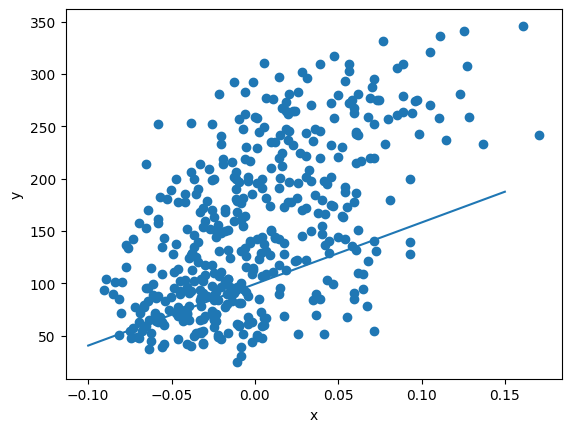

In [23]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [24]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


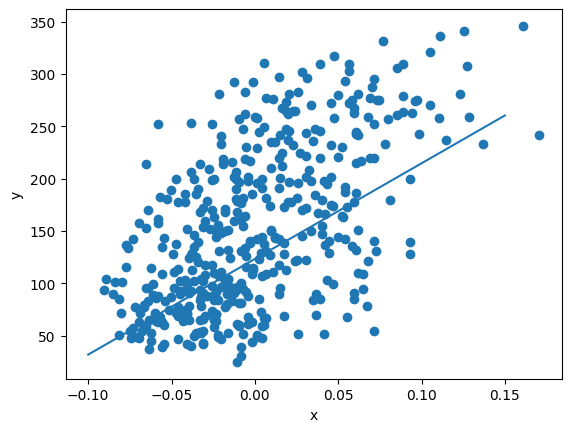

In [25]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


<function matplotlib.pyplot.show(close=None, block=None)>

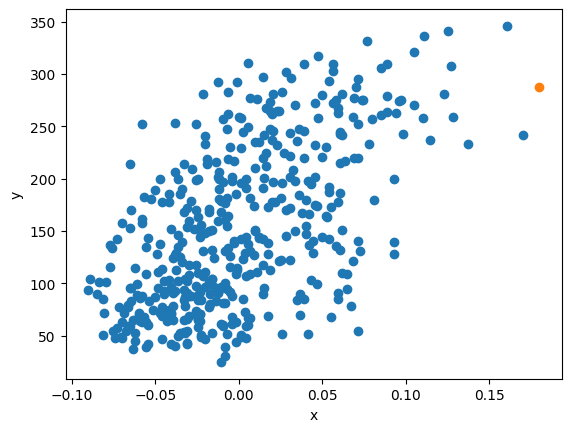

In [27]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show

### 3.3 뉴런 만들기


In [28]:
class Neuron:

    def __init__(self):
        self.w = 1.0                             # 가중치 초기화
        self.b = 1.0                             # 절편 초기화
    
    def forpass(self, x):
        y_hat = x * self.w + self.b              # 직선 방정식 계산
        return y_hat

    def backprop(self, x, err):
        w_grad = x * err                         # 가중치 그래디언트 계산
        b_grad =  1 * err                        # 절편 그래디언트 계산
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        for i in range(epochs):                  # 에포크만큼 반복
            for x_i, y_i in zip(x, y):           # 모든 샘플 반복
                y_hat = self.forpass(x_i)        # 정방향 계산
                err = -(y_i - y_hat)             # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)   # 역방향 계산
                self.w -= w_grad                 # 가중치 업데이트
                self.b -= b_grad                 # 절편 업데이트

In [29]:
neuron = Neuron()
neuron.fit(x, y)

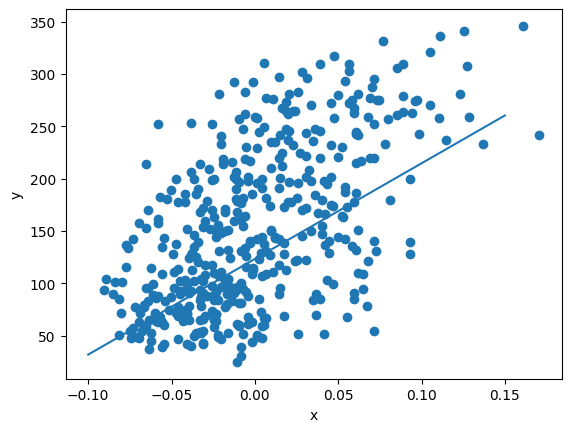

In [30]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# 2. 분류 뉴런 만들기

### 4.2 시그모이드 함수

In [31]:
import numpy as np

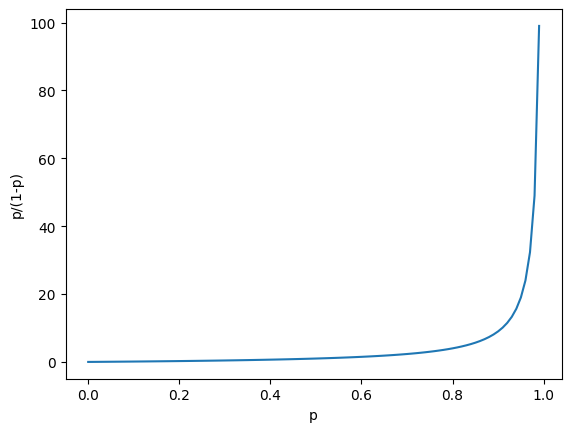

In [32]:
probs = np.arange(0, 1, 0.01)
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

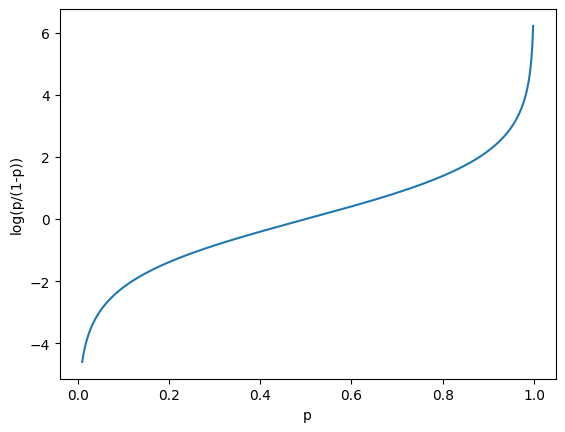

In [33]:
probs = np.arange(0.01, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

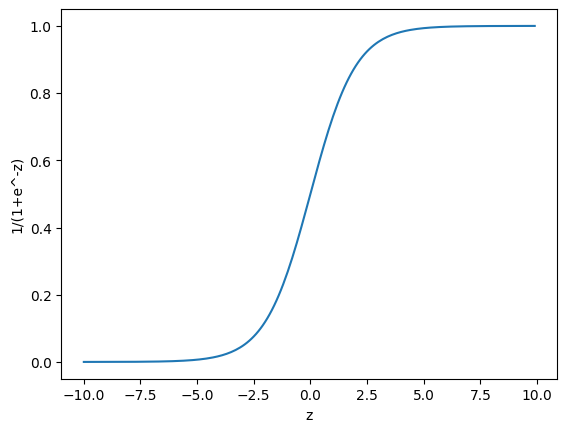

In [34]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

### 4.4 분류용데이터셋

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [36]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [37]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [38]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

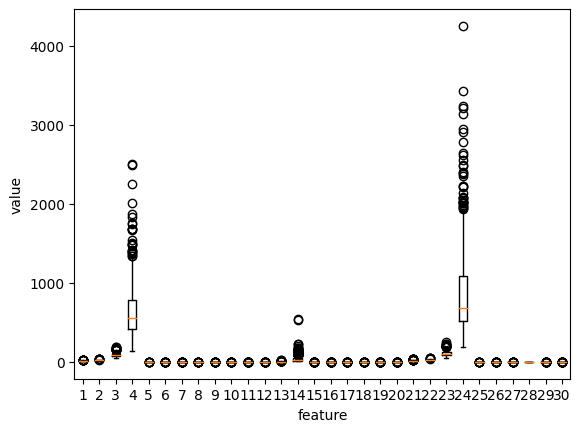

In [39]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [40]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [41]:
cancer.feature_names[[3,13,29]]

array(['mean area', 'area error', 'worst fractal dimension'], dtype='<U23')

In [42]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [43]:
x = cancer.data
y = cancer.target

### 4.5 로지스틱 회귀모델

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, # stratify=y는 클래스 레이블(y)을 기준으로 데이터를 계층화하여 클래스 비율을 유지
                                                    test_size=0.2, random_state=42) # random_state=42는 난수 발생기의 초기값을 42로 설정하여 무작위 데이터 분할의 재현성을 보장

In [46]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [47]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [48]:
class LogisticNeuron:
    def __init__(self): # __init__ 함수는 클래스의 초기화를 담당하며, 객체의 속성을 초기화하기 위한 용도로 사용
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b #직선 방정식을 계산합니다.
        return z
    
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그래디언트를 계산
        b_grad = 1 * err # 절편에 대한 그래디언트를 계산
        return w_grad, b_grad
    
    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])   # 가중치 초기화
        self.b = 0                     # 절편 초기화
        for i in range(epochs):        # epochs 반복 
            for x_i, y_i in zip(x, y):  # 모든 샘플 반복
                z = self.forpass(x_i)   # 정방향 계산
                a = self.activation(z)  # 활성화 함수 적용
                err = -(y_i - a)       # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad   # 가중치 업데이트
                self.b -= b_grad   # 절편업데이트

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]   # 정방향 계산
        a = self.activation(np.array(z))       # 활성화 함수 적용
        return a > 0.5


In [49]:
a = np.array([1, 2, 3])
b = np.array([3, 4, 5])

In [50]:
a + b

array([4, 6, 8])

In [51]:
a * b

array([ 3,  8, 15])

In [52]:
np.sum(a * b)

26

In [53]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [54]:
np.full((2,3), 7)

array([[7, 7, 7],
       [7, 7, 7]])

In [55]:
np.c_[np.zeros((2, 3)), np.ones((2, 3))]

array([[0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

In [56]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [57]:
np.mean(neuron.predict(x_test) == y_test)

0.8245614035087719

### 5.6 단일층 신경망

In [58]:
class SingleLayer:

    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b #직선방정식 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그래디언트 계산
        b_grad = 1 * err # 절편에 대한 그래디언트 계산
        return w_grad, b_grad
    
    def activation(self, z):
        z = np.clip(z, -100, None) #안전한 np.exp() 계산을 위해 (z 값을 -100 이하로 떨어지지 않도록 보정하는 역할)
        a = 1 / (1 + np.exp(-z)) # 시그모이드 계산  (np.exp(z)의 계산 결과가 너무 크게 증가하여 수치 오버플로우를 일으키는 것을 방지)
        return a
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])   # 가중치 초기화
        self.b = 0                     # 절편 초기화
        for i in range(epochs):         # epochs 반복
            loss = 0
            # 인덱스 섞기
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                            # 모든 샘플에 대해 반복
                z = self.forpass(x[i])                   # 정방향 계산
                a = self.activation(z)                   # 활성화 함수 적용
                err = -(y[i] - a)                        # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad                         # 가중치 업데이트 
                self.b -= b_grad                         # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑한 후 손실 누적
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실 저장
            self.losses.append(loss/len(y))

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]             # 정방향 계산
        return np.array(z) > 0                           # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
    

In [59]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)


0.8245614035087719

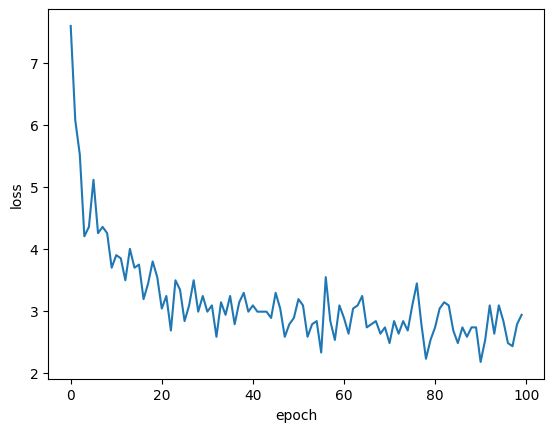

In [60]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 4.7 사이킷런 경사하강법

In [61]:
from sklearn.linear_model import SGDClassifier

> 확률적 경사하강법(SGD, Stochastic Gradient Descent)을 이용하여 선형모델을 구현

lossstr : 손실함수 (default='hinge')

penalty : {'l2', 'l1', 'elasticnet'}, default='l2'

alpha : 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)

l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)

fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default=True)

max_iter : 계산에 사용할 작업 수 (default=1000)

tol : 정밀도

shuffle : 에포크 후에 트레이닝 데이터를 섞는 유무 (default=True)

epsilon : 손실 함수에서의 엡실론, 엡실론이 작은 경우, 현재 예측과 올바른 레이블 간의 차이가 임계 값보다 작으면 무시 (default=0.1)

n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수

random_state : 난수 seed 설정

learning_rate : 학습속도 (default='optimal')

eta0 : 초기 학습속도 (default=0.0)

power_t : 역 스케일링 학습률 (default=0.5)

early_stopping : 유효성 검사 점수가 향상되지 않을 때 조기 중지여부 (default=False)

validation_fraction : 조기 중지를위한 검증 세트로 설정할 교육 데이터의 비율 (default=0.1)

n_iter_no_change : 조기중지 전 반복횟수 (default=5)

class_weight : 클래스와 관련된 가중치 {class_label: weight} or “balanced”, default=None

warm_start : 초기화 유무 (default=False)

average : True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 결과를 coef_속성에 저장 (default=False)

In [62]:
sgd = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [63]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])